<a href="https://colab.research.google.com/github/koushik-ace/NLP/blob/main/2403A52258_Assignment_5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("crowdflower/twitter-airline-sentiment")

print("Path to dataset files:", path)

100%|██████████| 2.55M/2.55M [00:00<00:00, 125MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/crowdflower/twitter-airline-sentiment/versions/4


## Load Tweet Data



In [ ]:
import pandas as pd

file_path = f"{path}/Tweets.csv"
df = pd.read_csv(file_path)
print(f"Successfully loaded data from {file_path}.")
df.head()

Successfully loaded data from /root/.cache/kagglehub/datasets/crowdflower/twitter-airline-sentiment/versions/4/Tweets.csv.


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Extract Tweet Text



In [ ]:
tweets = df['text']
print("Successfully extracted tweet text.")
print(tweets.head())

Successfully extracted tweet text.
0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object


## Visualize Hashtags




In [ ]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def extract_hashtags(text):
    hashtags = re.findall(r'#(\w+)', text)
    return [tag.lower() for tag in hashtags]

all_hashtags = []
for tweet in tweets:
    all_hashtags.extend(extract_hashtags(tweet))

hashtag_counts = Counter(all_hashtags)

# Identify the top 20 most frequent hashtags
top_n = 20
top_hashtags = hashtag_counts.most_common(top_n)

print(f"Top {top_n} most frequent hashtags:")
for tag, count in top_hashtags:
    print(f"#{tag}: {count}")

Top 20 most frequent hashtags:
#destinationdragons: 81
#fail: 69
#jetblue: 48
#unitedairlines: 45
#customerservice: 36
#usairways: 30
#americanairlines: 27
#neveragain: 27
#united: 26
#usairwaysfail: 26
#disappointed: 25
#travel: 22
#avgeek: 22
#help: 21
#badservice: 21
#frustrated: 18
#badcustomerservice: 18
#nothappy: 14
#flight: 13
#epicfail: 12


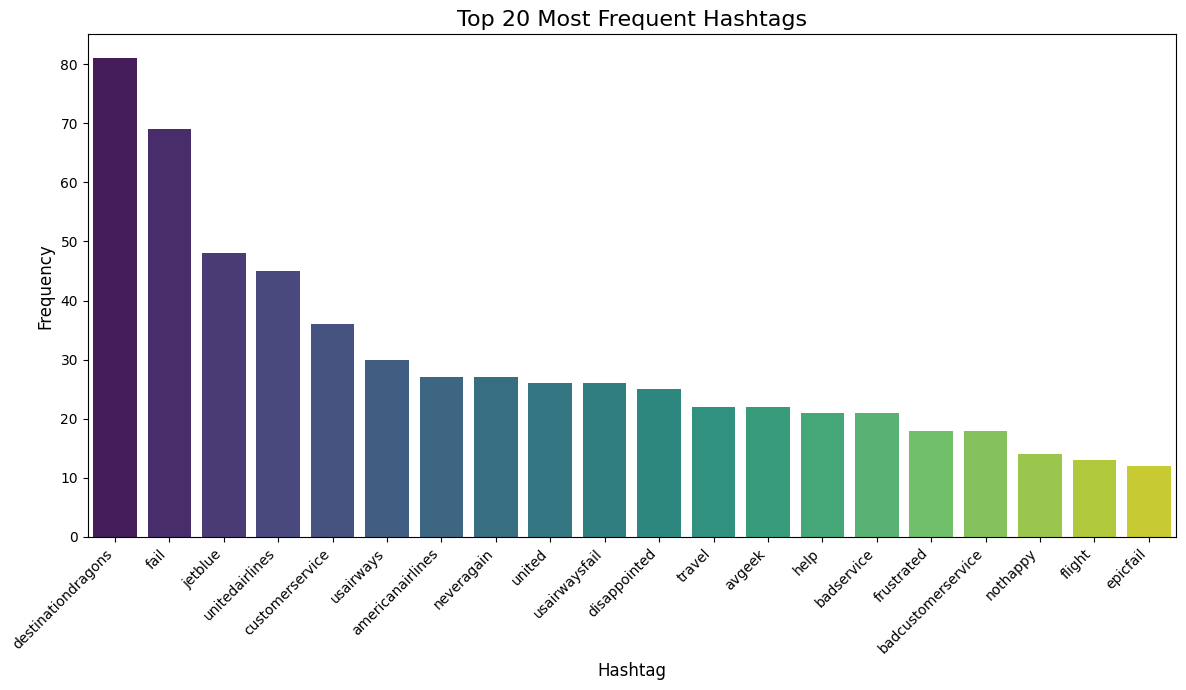

Bar chart of top 20 most frequent hashtags displayed.


In [ ]:
hashtags_df = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Frequency'])

plt.figure(figsize=(12, 7))
sns.barplot(x='Hashtag', y='Frequency', hue='Hashtag', data=hashtags_df, palette='viridis', legend=False)
plt.title('Top 20 Most Frequent Hashtags', fontsize=16)
plt.xlabel('Hashtag', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar chart of top 20 most frequent hashtags displayed.")

## Clean Text Data



In [ ]:
import re

# Function to remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Function to remove user mentions
def remove_mentions(text):
    mention_pattern = re.compile(r'@\w+')
    return mention_pattern.sub(r'', text)

# Function to remove emojis (a basic approach using regex for common emoji ranges)
def remove_emojis(text):
    # Regex for common emojis, might not cover all Unicode emojis
    emoji_pattern = re.compile(
        "[" # Start character class
        "\U0001F600-\U0001F64F" # Emoticons
        "\U0001F300-\U0001F5FF" # Symbols & Pictographs
        "\U0001F680-\U0001F6FF" # Transport & Map Symbols
        "\U0001F1E0-\U0001F1FF" # Flags (iOS)
        "\U00002702-\U000027B0" # Dingbats
        "\U000024C2-\U0001F251" # Various symbols
        "]+"
    )
    return emoji_pattern.sub(r'', text)

# Function to remove special characters
def remove_special_characters(text):
    # Remove anything that is not a word character (alphanumeric or underscore) or a space
    return re.sub(r'[^\w\s]', '', text)


# Apply cleaning functions sequentially
cleaned_tweets = tweets.apply(remove_urls)
cleaned_tweets = cleaned_tweets.apply(remove_mentions)
cleaned_tweets = cleaned_tweets.apply(remove_emojis)
cleaned_tweets = cleaned_tweets.apply(remove_special_characters)

print("Successfully cleaned tweet text.")
print(cleaned_tweets.head())

Successfully cleaned tweet text.
0                                           What  said
1     plus youve added commercials to the experienc...
2     I didnt today Must mean I need to take anothe...
3     its really aggressive to blast obnoxious ente...
4              and its a really big bad thing about it
Name: text, dtype: object


## NLTK Word Tokenization and Stop Word Removal



In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

stop_words = set(stopwords.words('english'))
print("NLTK modules imported and data downloaded. English stop words loaded.")

NLTK modules imported and data downloaded. English stop words loaded.


In [ ]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    # Convert tokens to lowercase and remove non-alphabetic characters
    filtered_tokens = [word.lower() for word in tokens if word.isalpha()]
    # Remove stop words
    words_without_stopwords = [word for word in filtered_tokens if word not in stop_words]
    return words_without_stopwords

tokenized_tweets = cleaned_tweets.apply(tokenize_and_remove_stopwords)

print("Successfully tokenized tweets and removed stop words.")
print(tokenized_tweets.head())

Successfully tokenized tweets and removed stop words.
0                                               [said]
1        [plus, added, commercials, experience, tacky]
2       [today, must, mean, need, take, another, trip]
3    [really, aggressive, blast, obnoxious, enterta...
4                            [really, big, bad, thing]
Name: text, dtype: object


## NLTK Lemmatization and Rejoining


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

lemmatizer = WordNetLemmatizer()
print("NLTK WordNetLemmatizer imported and data downloaded. Lemmatizer instantiated.")

NLTK WordNetLemmatizer imported and data downloaded. Lemmatizer instantiated.


In [ ]:
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

lemmatized_tweets = tokenized_tweets.apply(lemmatize_tokens)

def rejoin_words(words):
    return " ".join(words)

rejoined_lemmatized_tweets = lemmatized_tweets.apply(rejoin_words)

print("Successfully lemmatized tokens and rejoined into sentences.")
print(rejoined_lemmatized_tweets.head())

Successfully lemmatized tokens and rejoined into sentences.
0                                                 said
1               plus added commercial experience tacky
2               today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object


## SpaCy Processing Pipeline

### Subtask:
Develop and apply a spaCy pipeline to the cleaned text to perform tokenization, extract lemmas, and determine Part-of-Speech (POS) tags for each word.


In [ ]:
import spacy

# Download the small English language model if not already present
try:
    nlp = spacy.load('en_core_web_sm')
    print("spaCy model 'en_core_web_sm' loaded successfully.")
except OSError:
    print("Downloading spaCy model 'en_core_web_sm'...")
    !python -m spacy download en_core_web_sm --quiet
    nlp = spacy.load('en_core_web_sm')
    print("spaCy model 'en_core_web_sm' downloaded and loaded successfully.")

spaCy model 'en_core_web_sm' loaded successfully.


In [ ]:
def process_with_spacy(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    lemmas = [token.lemma_ for token in doc]
    pos_tags = [token.pos_ for token in doc]
    return tokens, lemmas, pos_tags

spacy_processed_data = cleaned_tweets.apply(process_with_spacy)

# Split the tuple of lists into separate columns in a new DataFrame
spacy_df = pd.DataFrame(
    spacy_processed_data.tolist(),
    columns=['spacy_tokens', 'spacy_lemmas', 'spacy_pos_tags']
)

print("Successfully processed tweets with spaCy.")
print(spacy_df.head())

Successfully processed tweets with spaCy.
                                        spacy_tokens  \
0                              [ , What,  , said, .]   
1  [ , plus, you, 've, added, commercials, to, th...   
2  [ , I, did, n't, today, ..., Must, mean, I, ne...   
3  [ , it, 's, really, aggressive, to, blast, obn...   
4  [ , and, it, 's, a, really, big, bad, thing, a...   

                                        spacy_lemmas  \
0                               [ , what,  , say, .]   
1  [ , plus, you, have, add, commercial, to, the,...   
2  [ , I, do, not, today, ..., must, mean, I, nee...   
3  [ , it, be, really, aggressive, to, blast, obn...   
4  [ , and, it, be, a, really, big, bad, thing, a...   

                                      spacy_pos_tags  
0                  [SPACE, PRON, SPACE, VERB, PUNCT]  
1  [SPACE, CCONJ, PRON, AUX, VERB, NOUN, ADP, DET...  
2  [SPACE, PRON, VERB, PART, NOUN, PUNCT, AUX, VE...  
3  [SPACE, PRON, AUX, ADV, ADJ, PART, VERB, ADJ, ...  
4  [SPACE

In [ ]:
import pandas as pd

# Assuming all previous functions (remove_urls, remove_mentions, remove_emojis, tokenize_and_remove_stopwords,
# lemmatize_tokens, rejoin_words, process_with_spacy) and variables (stop_words, lemmatizer, nlp) are accessible from prior cells.

def full_text_processing_pipeline(raw_text):
    # Cleaning steps
    cleaned_text = remove_urls(raw_text)
    cleaned_text = remove_mentions(cleaned_text)
    cleaned_text = remove_emojis(cleaned_text)

    # NLTK processing
    # Handle cases where text might become empty after cleaning to prevent errors in NLTK processing
    if not cleaned_text.strip():
        nltk_tokens = []
        nltk_lemmas = []
        nltk_rejoined = ""
    else:
        nltk_tokens = tokenize_and_remove_stopwords(cleaned_text)
        nltk_lemmas = lemmatize_tokens(nltk_tokens)
        nltk_rejoined = rejoin_words(nltk_lemmas)

    # spaCy processing
    spacy_tokens, spacy_lemmas, spacy_pos_tags = process_with_spacy(cleaned_text)

    return {
        'raw_text': raw_text,
        'cleaned_text': cleaned_text,
        'nltk_tokens': nltk_tokens,
        'nltk_lemmas': nltk_lemmas,
        'nltk_rejoined_text': nltk_rejoined,
        'spacy_tokens': spacy_tokens,
        'spacy_lemmas': spacy_lemmas,
        'spacy_pos_tags': spacy_pos_tags
    }

# Apply the pipeline to the original 'tweets' Series
pipeline_results_df = tweets.apply(full_text_processing_pipeline).apply(pd.Series)

print("Full pipeline applied to all tweets. Displaying head of the results DataFrame:")
print(pipeline_results_df.head())

Full pipeline applied to all tweets. Displaying head of the results DataFrame:
                                            raw_text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        cleaned_text  \
0                                        What  said.   
1   plus you've added commercials to the experien...   
2   I didn't today... Must mean I need to take an...   
3   it's really aggressive to blast obnoxious "en...   
4           and it's a really big bad thing about it   

                                         nltk_tokens  \
0                                             [said]   
1      [plus, added, commercials, experience, tacky]   
2     [today, must, mean, need, take, another, trip]   
3  [really, aggressive,

In [ ]:
sentiment_rejoined_df = pd.DataFrame({
    'rejoined_lemmatized_tweets': pipeline_results_df['nltk_rejoined_text'],
    'airline_sentiment': df['airline_sentiment']
})


sentiment_rejoined_df.head()

,rejoined_lemmatized_tweets,airline_sentiment
0,said,neutral
1,plus added commercial experience tacky,positive
2,today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainmen...,negative
4,really big bad thing,negative
